# IE UMAP Visualisation of 300K 

This notebook is to build a UMAP visualisation of the 300K data set, and use the flag for commensurate bilayers for higlighing the umap plot. 

## Imports

in addition to the usual libraries like pandas, plotting and sklearn, UMAP is imported for fitting a manifold on a multi dimensional space

In [1]:
import sys 
print(sys.version)

3.6.9 (default, Jul  3 2019, 15:36:16) 
[GCC 5.4.0 20160609]


In [2]:
import numpy as np
import sklearn
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from utils.data import Data

In [3]:
import umap
import numba

## Read Data

In [4]:
d = Data()

In [5]:
# v2 = True: loading the dataset with the con flag
df = d.get300K_features(v2=True)

set index
time to load 8.70


In [6]:
df.head()

,bilayer,monolayer1,monolayer2,IE,IE_error,IE_rel_error,C33,C33_error,C33_rel_err,Atom_EA_Min,...,Atom_Ratio_Density_TDebye0_Min,Atom_Ratio_ENARrev_YoungsModule_Min,Atom_Ratio_dHFus_SpeedSound_StDiv,EState_Topo_Ni_Zeff,EState_Topo_Pd_Zeff,EState_Topo_Te_dHAtom,Moment_SpeedSound_1,Moment_TCurie_1,SG187,commensurate
uid,,,,,,,,,,,,,,,,,,,,,
Hf3Te2_Mo1S2-T1,Hf3Te2_Mo1S2-T1,Hf3Te2,Mo1S2-T1,-0.698046,0.081306,0.058239,36.954759,6.369837,0.086184,0.05468,...,0.34662,0.13349,0.03793,0.0,0.0,197.0,0.78230,0.0,0,False
Hf3Te2_W1S2-T1,W1S2-T1_Hf3Te2,W1S2-T1,Hf3Te2,-0.677167,0.080142,0.059174,44.432743,7.523579,0.084663,0.05818,...,0.48604,0.23500,0.03793,0.0,0.0,197.0,0.78230,0.0,0,False
Cr1S2-T1_Hf3Te2,Hf3Te2_Cr1S2-T1,Hf3Te2,Cr1S2-T1,-0.661212,0.074767,0.056538,54.217246,11.076879,0.102153,0.05106,...,0.28118,0.13477,0.03793,0.0,0.0,197.0,2.43511,0.0,0,False
Ca2La2I10-T1_Ti2Ge2O6,Ti2Ge2O6_Ca2La2I10-T1,Ti2Ge2O6,Ca2La2I10-T1,-0.658413,0.117797,0.089456,49.623362,18.454026,0.185941,0.00526,...,0.09343,0.02233,0.09867,0.0,0.0,0.0,-4.56952,0.0,0,False
Ca2La2I10-T1_Ta3Te1I7,Ca2La2I10-T1_Ta3Te1I7,Ca2La2I10-T1,Ta3Te1I7,-0.657006,0.083776,0.063756,28.505406,4.794372,0.084096,0.01765,...,0.25418,0.14754,0.07947,0.0,0.0,197.0,-5.53334,0.0,0,False


### get descriptors column names 

In [7]:
feature_cols = d.getDescriptorsColumnNames_IE()

In [8]:
feature_cols

0
1                              Atom_HardnessRB_StDiv
2             Atom_Inv_Diff_ENARrev_ENGordyRev_Range
3                  Atom_Inv_Diff_ENGordyRev_EA_StDiv
4                 Atom_Inv_Diff_ENGordyRev_IP5_StDiv
5                 Atom_Inv_Diff_ENGordyRev_IP6_StDiv
6                        Atom_Inv_Diff_IP7_IP8_StDiv
7            Atom_Inv_Mult_EA_ThermalExpansion_Range
8              Atom_Inv_Mult_IP2_LatticeConstant_Min
9               Atom_Inv_Mult_SpeedSound_Zeff_Median
10                Atom_Log_Mult_ENGordyRev_IP6_Range
11                    Atom_Log_Mult_IP7_Period_Range
12    Atom_Log_Mult_SpeedSound_RadiiCordero08_Median
13                      Atom_Log_Ratio_IP2_IP3_StDiv
14                        Atom_Log_Ratio_IP6_IP7_Max
15          Atom_Log_Ratio_PoissonRatio_Ntotal_Range
16                           Atom_Mult_EA_dHAtom_Max
17                         Atom_Mult_EA_dHAtom_StDiv
18                          Atom_Mult_EA_dHFus_StDiv
19                      Atom_Mult_IP8_SpeedS

## sampling bilayers

In [9]:
df.columns

Index(['bilayer', 'monolayer1', 'monolayer2', 'IE', 'IE_error', 'IE_rel_error',
       'C33', 'C33_error', 'C33_rel_err', 'Atom_EA_Min',
       ...
       'Atom_Ratio_Density_TDebye0_Min', 'Atom_Ratio_ENARrev_YoungsModule_Min',
       'Atom_Ratio_dHFus_SpeedSound_StDiv', 'EState_Topo_Ni_Zeff',
       'EState_Topo_Pd_Zeff', 'EState_Topo_Te_dHAtom', 'Moment_SpeedSound_1',
       'Moment_TCurie_1', 'SG187', 'commensurate'],
      dtype='object', length=131)

In [10]:
df[(df.commensurate == True)].shape
df_features = df


In [11]:
n = df.shape[0]

In [ ]:
#n = 50000
#df_features = df.sample(n=n)

In [12]:
df_features.head()

,bilayer,monolayer1,monolayer2,IE,IE_error,IE_rel_error,C33,C33_error,C33_rel_err,Atom_EA_Min,...,Atom_Ratio_Density_TDebye0_Min,Atom_Ratio_ENARrev_YoungsModule_Min,Atom_Ratio_dHFus_SpeedSound_StDiv,EState_Topo_Ni_Zeff,EState_Topo_Pd_Zeff,EState_Topo_Te_dHAtom,Moment_SpeedSound_1,Moment_TCurie_1,SG187,commensurate
uid,,,,,,,,,,,,,,,,,,,,,
Hf3Te2_Mo1S2-T1,Hf3Te2_Mo1S2-T1,Hf3Te2,Mo1S2-T1,-0.698046,0.081306,0.058239,36.954759,6.369837,0.086184,0.05468,...,0.34662,0.13349,0.03793,0.0,0.0,197.0,0.78230,0.0,0,False
Hf3Te2_W1S2-T1,W1S2-T1_Hf3Te2,W1S2-T1,Hf3Te2,-0.677167,0.080142,0.059174,44.432743,7.523579,0.084663,0.05818,...,0.48604,0.23500,0.03793,0.0,0.0,197.0,0.78230,0.0,0,False
Cr1S2-T1_Hf3Te2,Hf3Te2_Cr1S2-T1,Hf3Te2,Cr1S2-T1,-0.661212,0.074767,0.056538,54.217246,11.076879,0.102153,0.05106,...,0.28118,0.13477,0.03793,0.0,0.0,197.0,2.43511,0.0,0,False
Ca2La2I10-T1_Ti2Ge2O6,Ti2Ge2O6_Ca2La2I10-T1,Ti2Ge2O6,Ca2La2I10-T1,-0.658413,0.117797,0.089456,49.623362,18.454026,0.185941,0.00526,...,0.09343,0.02233,0.09867,0.0,0.0,0.0,-4.56952,0.0,0,False
Ca2La2I10-T1_Ta3Te1I7,Ca2La2I10-T1_Ta3Te1I7,Ca2La2I10-T1,Ta3Te1I7,-0.657006,0.083776,0.063756,28.505406,4.794372,0.084096,0.01765,...,0.25418,0.14754,0.07947,0.0,0.0,197.0,-5.53334,0.0,0,False


In [13]:
df_features.shape

(296835, 131)

# UMAP

In [14]:
dir(umap)

['UMAP',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'distances',
 'nndescent',
 'numba',
 'pkg_resources',
 'rp_tree',
 'sparse',
 'spectral',
 'umap_',
 'utils']

In [15]:
reducer = umap.UMAP(random_state=50)

In [16]:
embedding = reducer.fit_transform(df_features[feature_cols])

/home/mutaz/.local/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../.local/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/mutaz/.local/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../.local/lib/python3.6/site-packages/umap/utils.py", line 409:
@numba.njit(par

In [17]:
embedding.shape

(296835, 2)

In [18]:
plot_df = pd.DataFrame(embedding,columns=['x','y'])

In [19]:
plot_df.head()

,x,y
0,-3.022211,23.582899
1,-3.027089,23.597912
2,-3.851520,23.520042
3,-12.639825,17.681980
4,-3.507485,20.284998


In [20]:
plot_df = pd.DataFrame({
    'x': embedding[:, 0],
    'y': embedding[:, 1],
    'IE': df_features.IE, 
    'commensurate': df_features.commensurate
})

In [21]:
plot_df.head()

,x,y,IE,commensurate
uid,,,,
Hf3Te2_Mo1S2-T1,-3.022211,23.582899,-0.698046,False
Hf3Te2_W1S2-T1,-3.027089,23.597912,-0.677167,False
Cr1S2-T1_Hf3Te2,-3.851520,23.520042,-0.661212,False
Ca2La2I10-T1_Ti2Ge2O6,-12.639825,17.681980,-0.658413,False
Ca2La2I10-T1_Ta3Te1I7,-3.507485,20.284998,-0.657006,False


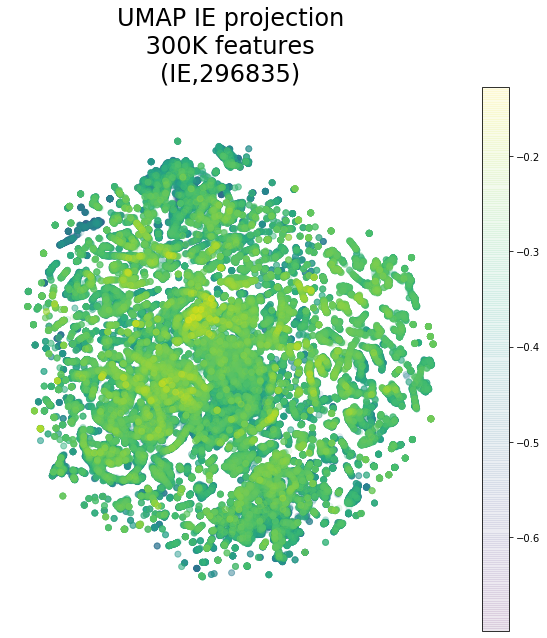

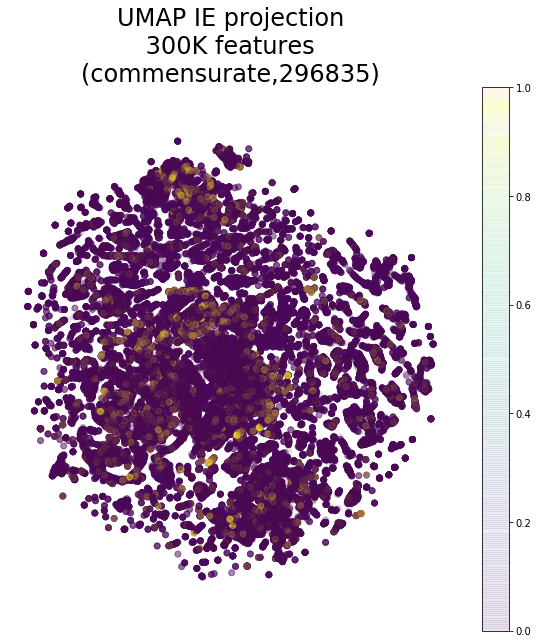

In [26]:
colorby = ['IE','commensurate']

for c in colorby: 
    plt.figure(figsize=(10, 10))
    plt.scatter(data=plot_df, x='x', y='y', c=c, alpha=.1)
    plt.gca().set_aspect('equal', 'datalim')
    plt.title(f'UMAP {colorby[0]} projection\n 300K features \n({c},{n})', fontsize=24);
    plt.axis('off')
    plt.colorbar()
    plt.savefig(f'plots/300K_{colorby[0]}_umap_{n}_samples_colorby_{c}.png', transparent=True)

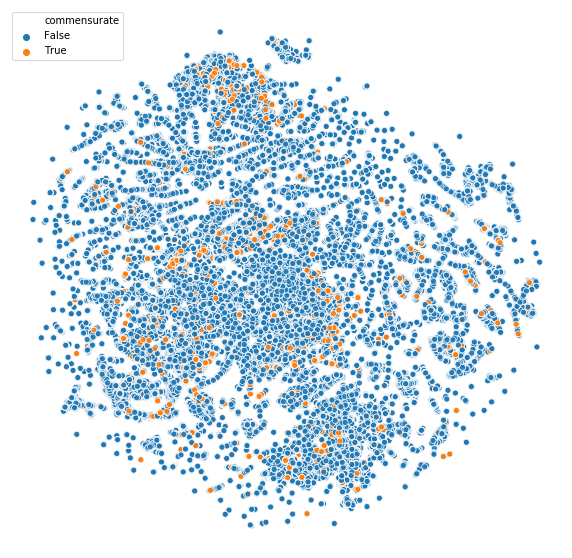

In [27]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x='x', y='y',
    hue="commensurate",
   # palette=sns.color_palette("hls", 500),
    data=plot_df,
    alpha=0.9
)
plt.legend(loc='upper left')
plt.axis('off')
plt.savefig(f'plots/300K_{colorby[0]}_umap_{n}_samples_colorby_commensurate_bool.png', transparent=True)
plt.show()

### save embeddings to disk

In [28]:
from utils.config import Config

In [29]:
plot_df.head()

,x,y,IE,commensurate
uid,,,,
Hf3Te2_Mo1S2-T1,-3.022211,23.582899,-0.698046,False
Hf3Te2_W1S2-T1,-3.027089,23.597912,-0.677167,False
Cr1S2-T1_Hf3Te2,-3.851520,23.520042,-0.661212,False
Ca2La2I10-T1_Ti2Ge2O6,-12.639825,17.681980,-0.658413,False
Ca2La2I10-T1_Ta3Te1I7,-3.507485,20.284998,-0.657006,False


In [30]:
plot_df.to_csv(Config().get_datapath('umap_plot_df_IE.csv'))